# Module 1 Graded Quiz


1. Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions.We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.
    What was the Annualized Return of the Lo 20 portfolio over the entire period?

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit_106 as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Prepare dataframe
df = pd.read_csv('/Coursera/Investment Management with Python and Machine Learning/Introduction to Portfolio Construction and Analysis with Python/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                 header=0, index_col=0, parse_dates=True, na_values=-99.99)
cols = ['Lo 20', 'Hi 20']
returns = df[cols]
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index = returns.index.to_period('M')
returns = returns/100 # convert to 1 + R format
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [3]:
# Calculate return per month
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [4]:
# Annualized return with return per month calculation explicit
annualized_return = (return_per_month + 1)**12-1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [5]:
# Annualized return with return per month calculation implicit
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [6]:
print('The Annualized Return of the Lo 20 portfolio over the entire period was {}%'.format(round(annualized_return['Lo 20']*100,2)))

The Annualized Return of the Lo 20 portfolio over the entire period was 15.2%


2. What was the Annualized Volatility of the Lo 20 portfolio over the entire period?

In [7]:
# Calculate the annualized volatility
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [8]:
print('The Annualized Volatility of the Lo 20 portfolio over the entire period was {}%'.format(round(annualized_vol['Lo 20']*100,1)))

The Annualized Volatility of the Lo 20 portfolio over the entire period was 33.7%


3. What was the Annualized Return of the Hi 20 portfolio over the entire period?

In [9]:
print('The Annualized Return of the Hi 20 portfolio over the entire period was {}%'.format(round(annualized_return['Hi 20']*100,2)))

The Annualized Return of the Hi 20 portfolio over the entire period was 9.85%


4. What was the Annualized Volatility of the Hi 20 portfolio over the entire period ?

In [10]:
print('The Annualized Volatility of the Hi 20 portfolio over the entire period was {}%'.format(round(annualized_vol['Hi 20']*100,1)))

The Annualized Volatility of the Hi 20 portfolio over the entire period was 19.5%


5. What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [11]:
# # Annualized return with return per month calculation implicit period 1999 - 2015
n_months = returns['1999':'2015'].shape[0]
annualized_return = (returns['1999':'2015']+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [14]:
print('The Annualized Return of the Lo 20 portfolio over the 1999-2015 period was {}%'.format(round(annualized_return['Lo 20']*100,2)))

The Annualized Return of the Lo 20 portfolio over the 1999-2015 period was 11.44%


6. What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [13]:
# Calculate the annualized volatility
annualized_vol = returns['1999':'2015'].std()*np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64

In [16]:
print('The Annualized Volatility of the Lo 20 portfolio over the 1999-2015 period was {}%'.format(round(annualized_vol['Lo 20']*100,2)))

The Annualized Volatility of the Lo 20 portfolio over the 1999-2015 period was 22.89%


7. What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?

In [17]:
print('The Annualized Return of the Hi 20 portfolio over the 1999-2015 period was {}%'.format(round(annualized_return['Hi 20']*100,2)))

The Annualized Return of the Hi 20 portfolio over the 1999-2015 period was 6.29%


8. What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)?

In [18]:
print('The Annualized Volatility of the Hi 20 portfolio over the 1999-2015 period was {}%'.format(round(annualized_vol['Hi 20']*100,2)))

The Annualized Volatility of the Hi 20 portfolio over the 1999-2015 period was 17.27%


9. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

In [19]:
# Create drawdown function
def drawdown(return_series: pd.Series): #Input expected is a pandas dataframe series
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

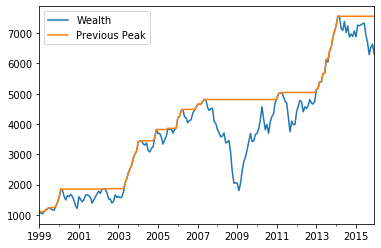

In [20]:
# plot
drawdown(returns['1999':'2015']['Lo 20'])[['Wealth', 'Previous Peak']].plot()

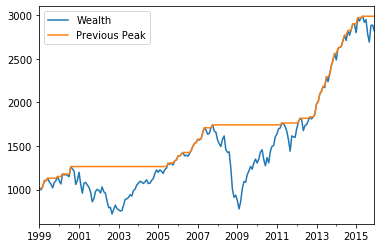

In [43]:
# plot
drawdown(returns['1999':'2015']['Hi 20'])[['Wealth', 'Previous Peak']].plot()

In [38]:
ans = -drawdown(returns['1999':'2015']["Lo 20"])['Drawdown'].min()
ans

0.6248092431236988

In [37]:
print('The Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio was {}%'.format(round(ans*100,2)))

The Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio was 62.48%


10. At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur?

In [39]:
print('The maximum drawdown on the SmallCap (Lo 20) portfolio occur at {}'.format(drawdown(returns['1999':'2015']["Lo 20"])['Drawdown'].idxmin()))

The maximum drawdown on the SmallCap (Lo 20) portfolio occur at 2009-02


11. What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

In [40]:
ans = -drawdown(returns['1999':'2015']["Hi 20"])['Drawdown'].min()
ans

0.5527349978713653

In [41]:
print('The Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Hi 20) portfolio was {}%'.format(round(ans*100,2)))

The Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Hi 20) portfolio was 55.27%


12. Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

In [42]:
print('The maximum drawdown on the SmallCap (Hi 20) portfolio occur at {}'.format(drawdown(returns['1999':'2015']["Hi 20"])['Drawdown'].idxmin()))

The maximum drawdown on the SmallCap (Hi 20) portfolio occur at 2009-02


13. For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?

In [56]:
# Get new dataframe
hfi = erk.get_hfi_returns()
erk.semideviation(hfi['2009':'2018']).sort_values(ascending = False)

Short Selling             0.021240
Emerging Markets          0.015276
Long/Short Equity         0.012139
CTA Global                0.010996
Event Driven              0.010135
Distressed Securities     0.009498
Funds Of Funds            0.007948
Convertible Arbitrage     0.006681
Relative Value            0.005711
Equity Market Neutral     0.005186
Global Macro              0.005075
Merger Arbitrage          0.003611
Fixed Income Arbitrage    0.003321
dtype: float64

14. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation?

In [57]:
erk.semideviation(hfi['2009':'2018']).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

15. Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?

In [59]:
erk.skewness(hfi['2009':]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

16. Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?

In [61]:
erk.kurtosis(hfi['2000':'2018']).sort_values(ascending = False)

Fixed Income Arbitrage    33.378729
Convertible Arbitrage     23.001449
Equity Market Neutral     20.329621
Relative Value            12.731096
Funds Of Funds             7.584725
Distressed Securities      6.231720
Emerging Markets           5.941289
Event Driven               5.543444
Merger Arbitrage           4.520785
Long/Short Equity          4.472589
Short Selling              4.352758
Global Macro               3.653278
CTA Global                 2.845022
dtype: float64